In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exercises

Within your codeup-data-science directory, create a new repo named anomaly-detection-exercises. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

Save this work in your anomaly-detection-exercises repo. Then add, commit, and push your changes.

continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 
- 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
#function that prints lower and upper bounds
def get_lower_and_upper_bounds(df, variable, multiplier):
    '''
    This function takes in df, desired variable, and multiplier
    and outputs the calculated lower and upper bound to locate outliers in variables
    additionally, a boxplot and histplot are created with that variables distribution
    '''
    #calculate q1 and q3
    q1, q3 = np.percentile(df[variable], [25,75])
    #calculate iqr
    iqr = q3 - q1
    #calculate lower_bounds
    lower_bound = q1 - (multiplier * iqr)
    #calculate upper_bounds
    upper_bound = q3 + (multiplier * iqr)
    
    #print upper and lower bounds
    print(f'Using {variable}:')
    print(f'the lower bound is: {lower_bound}')  
    print(f'the upper bound is: {upper_bound}')
    
    #create plots
    plt.figure(figsize=(16,4))
    plt.subplot(1, 2, 1)
    #histplot
    sns.histplot(data = df, x = variable, kde=True)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    #boxplot
    sns.boxplot(x=variable, data=df)
    plt.axvline(lower_bound, color='red')
    plt.axvline(upper_bound, color='red')
    plt.title(variable)
    plt.show()

In [3]:
## walkthrough teacher function
def get_bounds(col, mult=1.5):
    '''
    positional argument: col,a pandas Series
    kwarg: mult: float vale representing multiplier in tukey IQR boundaries
    return: lower_bound, upper_bound, two float values represeting the fense values of our based boundaries
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3-q1
    lower_bound= q1 - (iqr*mult)
    upper_bound= q3 + (iqr*mult)
    
    return lower_bound, upper_bound



************************

## 1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [4]:
# Read csv file into pandas DataFrame
file  = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
df = pd.read_csv(file)

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [7]:
# change the dtype of Date to the datetime format
df.Date = pd.to_datetime(df.Date)

In [8]:
# set Date as the index
df = df.set_index('Date')

In [9]:
# create a month and year columns to better understand the data
df['Month'] = df.index.month_name()
df['Year'] = df.index.year

In [10]:
# take a look at the data now
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,2017
2017-01-02,Monday,28.9,1.33,15,0.5,13,January,2017
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January,2017
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January,2017
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January,2017


In [11]:
# take a look at the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
 6   Month        365 non-null    object 
 7   Year         365 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 25.7+ KB


In [36]:
df.tail(1)

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year,z_score_Temperature,z_score_Flyers
Date,,,,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December,2017,-2.550311,-2.256137


In [12]:
# get the stats
df.describe()

# see some possible issues: temp max = 212, flyers min = -38

,Temperature,Rainfall,Flyers,Price,Sales,Year
count,365.000000,365.000000,365.000000,365.0,365.000000,365.0
mean,61.224658,0.825973,40.104110,0.5,27.865753,2017.0
std,18.085892,0.273890,13.786445,0.0,30.948132,0.0
min,15.100000,0.400000,-38.000000,0.5,7.000000,2017.0
25%,49.700000,0.650000,31.000000,0.5,20.000000,2017.0
50%,61.100000,0.740000,39.000000,0.5,25.000000,2017.0
75%,71.700000,0.910000,49.000000,0.5,30.000000,2017.0
max,212.000000,2.500000,80.000000,0.5,534.000000,2017.0


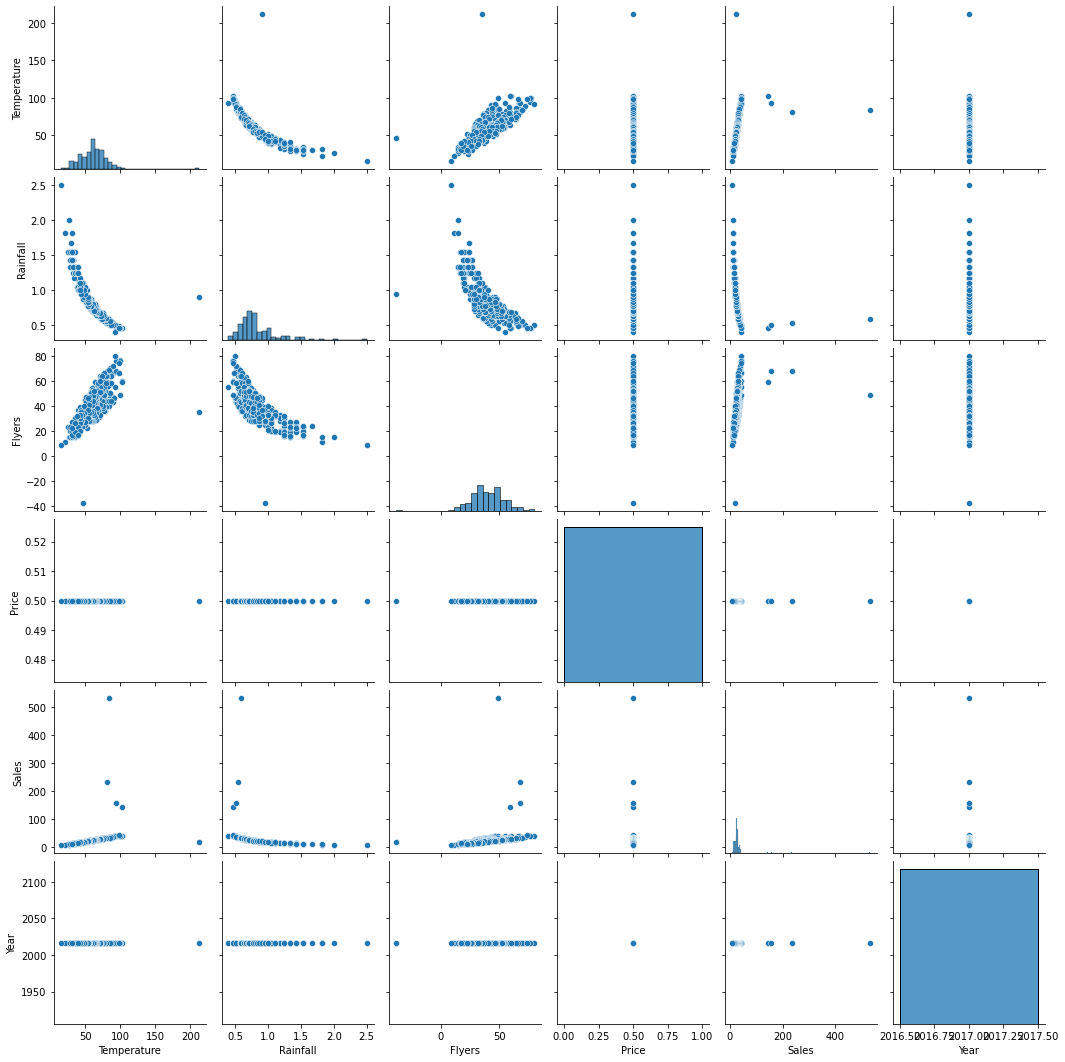

In [14]:
# look at the distribution bivariate
sns.pairplot(df)

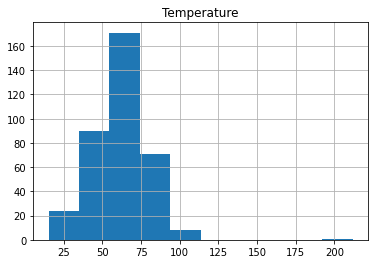

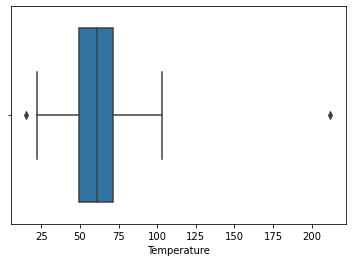

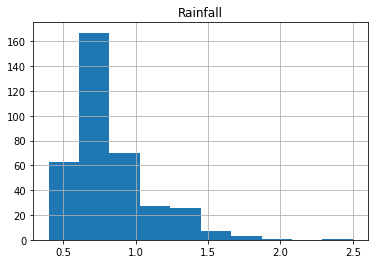

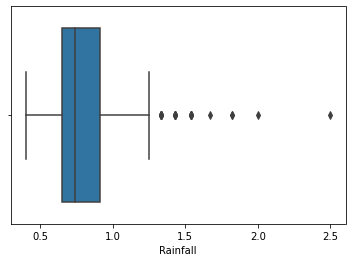

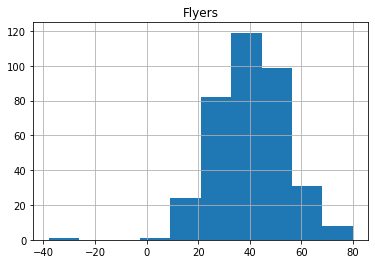

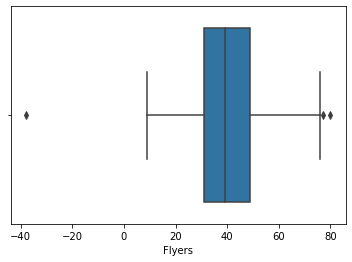

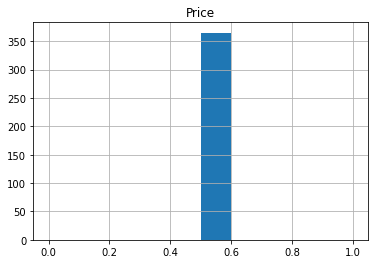

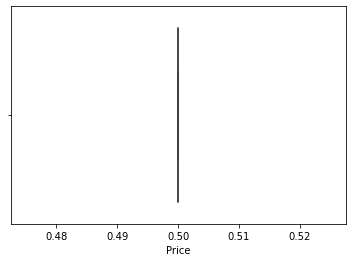

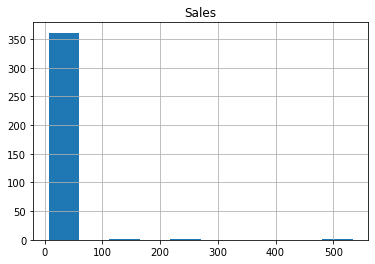

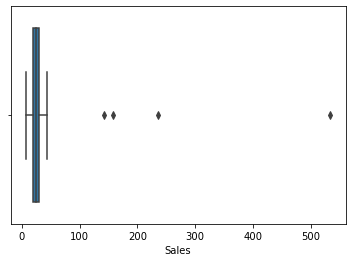

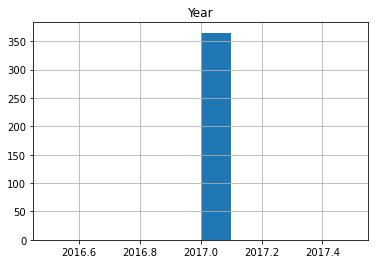

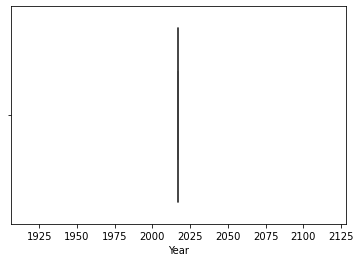

In [13]:
# iterate through columns
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        # histogram if it is numeric
        
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

### Takeaways:
- Max temp of 212 is way out there
- Flyers of -38 is not possible
- As months get hotter, sales go up
- As rainfall increases, sales go down
- As rainfall increases, flyers put out goes down
- Mostly as more flyers are put out, sales increases
- Normal Distribution is:
  - Flyers
  - Temperature
    - A right tail is rain

### 1. Using lemonade.csv dataset and focusing on continuous variables:

### 1a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [15]:
# teacher written function
# at a multiplier of 1.5:
# define an empty dictionary (initializing)
outlier = {}
# loop through my columns to utilize my function, compile
# the fences and the dataframe subsets into a dictionary
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('----------------------\n')
        outlier[col]={}
        outlier[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outlier[col]['df'] = df[(df[col]> upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 16.700000000000003
 Upper bound for Temperature: 104.7

----------------------

 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

----------------------

 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

----------------------

 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

----------------------

 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

----------------------

 Lower bound for Year : 2017.0
 Upper bound for Year: 2017.0

----------------------



In [ ]:
[print('\n~~~~~~~~~~~~')]

In [16]:
# teacher function
get_bounds(df['Rainfall'])

(0.26, 1.3)

Using Temperature:
the lower bound is: 16.700000000000003
the upper bound is: 104.7


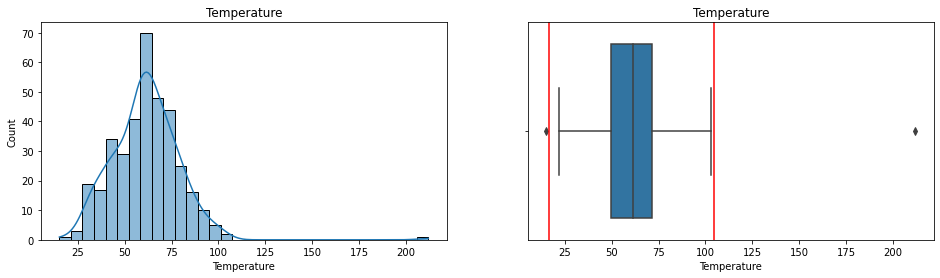

In [17]:
# get Temperature bounds
get_lower_and_upper_bounds(df, 'Temperature', 1.5)

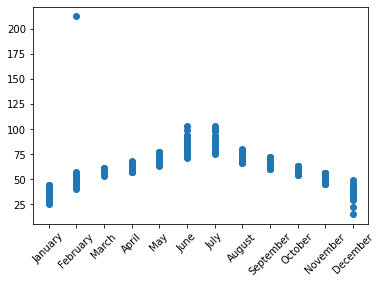

In [18]:
# take a look further into that 212 degree day
plt.xticks(rotation=45)
plt.scatter(df.Month, df.Temperature)

In [19]:
# look at specific days where temperature were outliers
df[df['Temperature'] > 104]

## no way it would be 212 in Feb

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,2017


Using Rainfall:
the lower bound is: 0.26
the upper bound is: 1.3


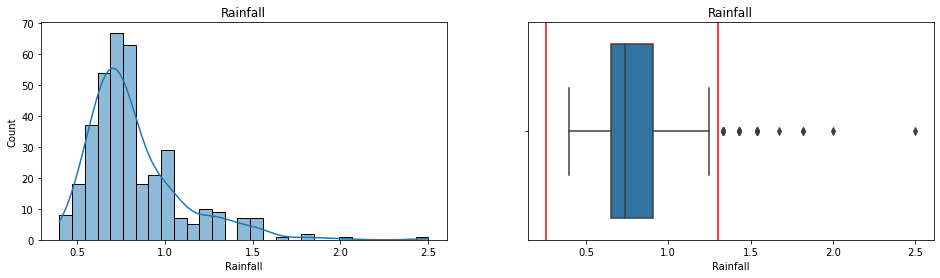

In [20]:
# get rainfall bounds
get_lower_and_upper_bounds(df, 'Rainfall', 1.5)

Using Flyers:
the lower bound is: 4.0
the upper bound is: 76.0


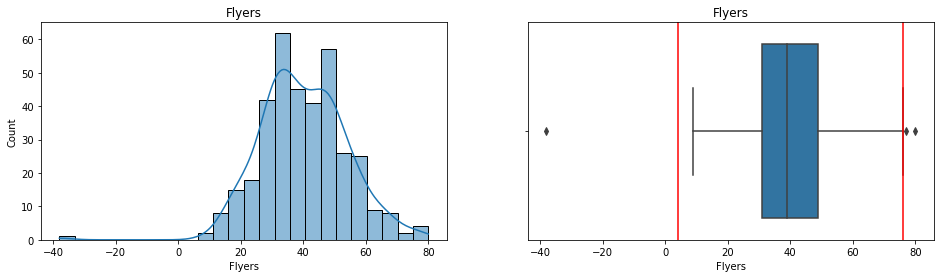

In [21]:
# get flyers bounds
get_lower_and_upper_bounds(df, 'Flyers', 1.5)

Using Price:
the lower bound is: 0.5
the upper bound is: 0.5


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


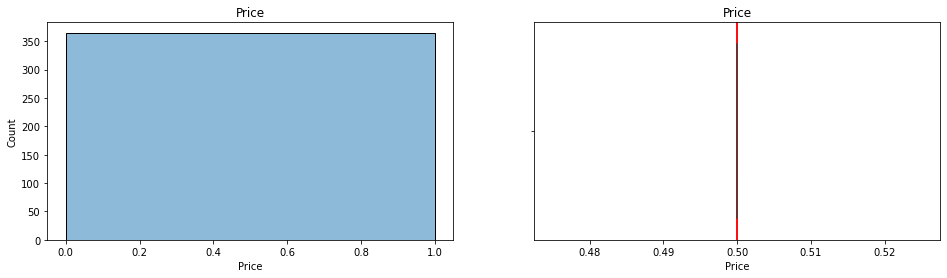

In [22]:
# get price bounds
get_lower_and_upper_bounds(df, 'Price', 1.5)

Using Sales:
the lower bound is: 5.0
the upper bound is: 45.0


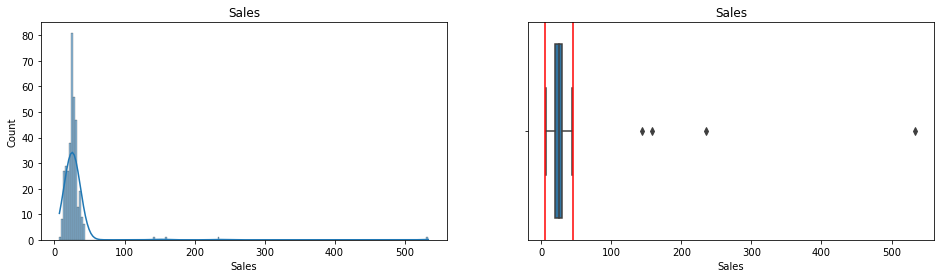

In [23]:
# get sales bounds
get_lower_and_upper_bounds(df, 'Sales', 1.5)

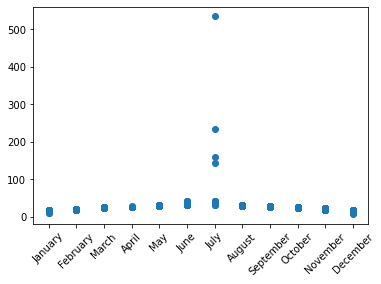

In [24]:
# look into that high sell period
plt.xticks(rotation=45)
plt.scatter(df.Month, df.Sales)

# looks like high sales were in july!
# July is a hot month and July 4 is a holiday so it is possible

In [25]:
# look at specific days where sales were outliers
df[df['Sales'] > 45]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year
Date,,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July,2017
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July,2017
2017-07-03,Monday,81.5,0.54,68,0.5,235,July,2017
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July,2017


In [26]:
# lowest sales of 7 in December makes sense
df[df['Sales'] == 7]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,Year
Date,,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December,2017


### 1b. Do these upper outliers make sense?
- 212 degrees in December, NO
### Which outliers should be kept?
- Rainfall and Flyers

### 1c. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

Using Temperature:
the lower bound is: -16.299999999999997
the upper bound is: 137.7


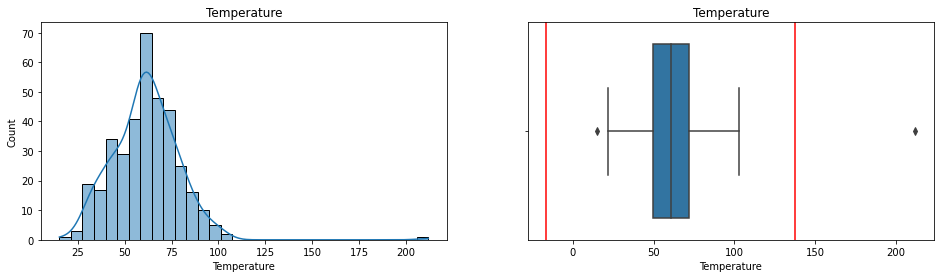

In [27]:
 #get temperature bounds with 3x
get_lower_and_upper_bounds(df, 'Temperature', 3.0)

Using Rainfall:
the lower bound is: -0.13
the upper bound is: 1.69


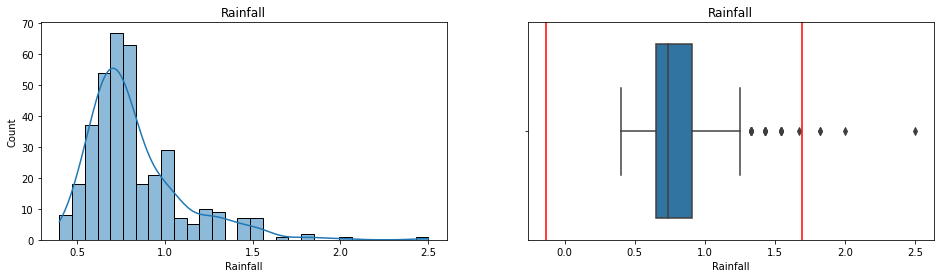

In [28]:
# get rainfall bounds with 3x
get_lower_and_upper_bounds(df, 'Rainfall', 3.0)

Using Flyers:
the lower bound is: -23.0
the upper bound is: 103.0


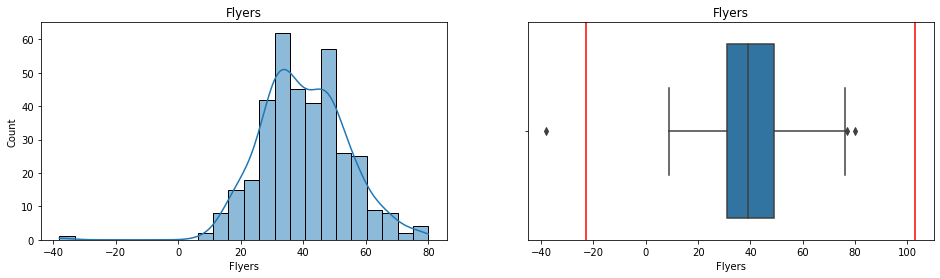

In [29]:
# get flyers bounds with 3x
get_lower_and_upper_bounds(df, 'Flyers', 3.0)

Using Price:
the lower bound is: 0.5
the upper bound is: 0.5


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


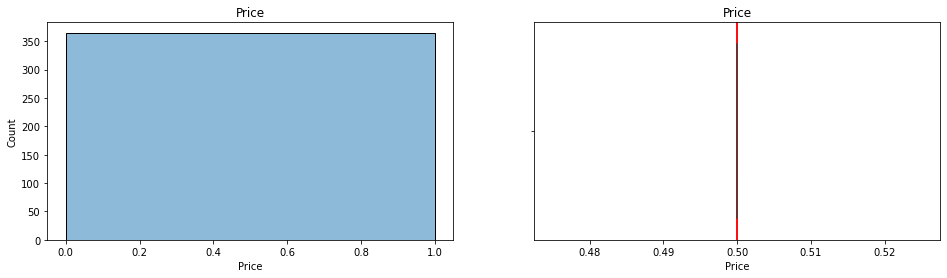

In [30]:
# get price bounds with 3x
get_lower_and_upper_bounds(df, 'Price', 3.0)

Using Sales:
the lower bound is: -10.0
the upper bound is: 60.0


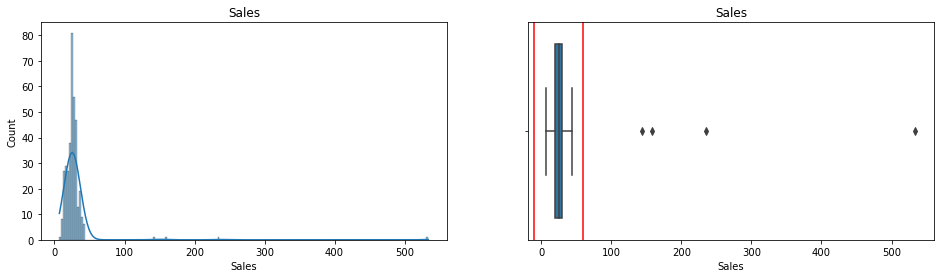

In [31]:
# get sales bounds with 3x
get_lower_and_upper_bounds(df, 'Sales', 3.0)

### 1c. Do these lower outliers make sense? 

- Not all outliers make sense, -.13 for rainfall, -23 for flyers, -10 for sales.

### Which outliers should be kept?¶
- Temperature and price


### 1d. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. 
- Graphs above for the upper bound

### Do these upper outliers make sense? 
- Temperatue NO, Sales maybe

### Which outliers should be kept?
- Rainfall, flyers, possibly sales


## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

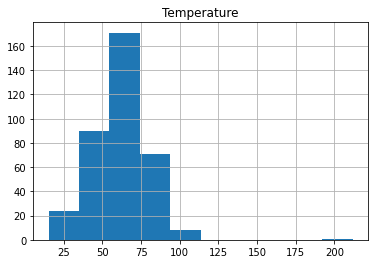

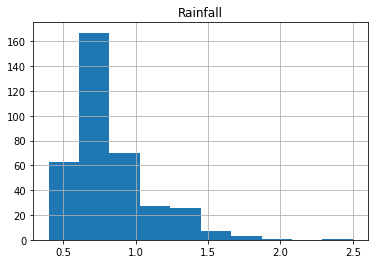

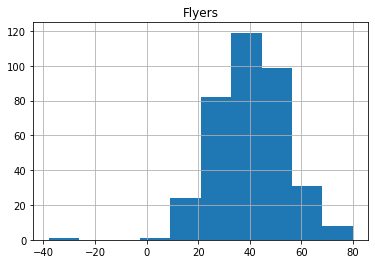

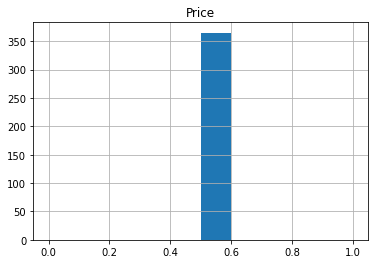

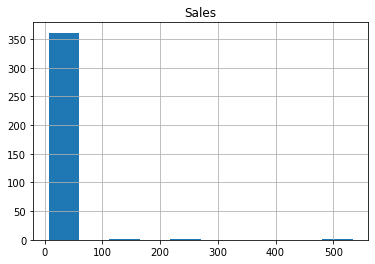

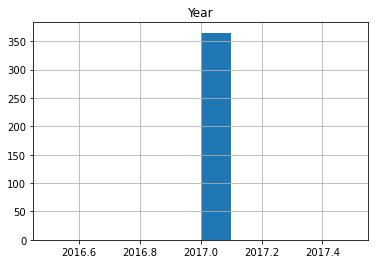

In [32]:
for col in df.columns:
    #determine if is numeric dtype
    if np.issubdtype(df[col].dtype, np.number):
        #histogram if it is numeric
        df[col].hist()
        plt.title(col)
        plt.show()

### Temperature and Rainfall are the most normal distributed

In [33]:
# #assign columns with normal distribution to variable
normcols = ['Temperature', 'Flyers']

In [34]:
for col in normcols:
    df['z_score_'+col] = (df[col] -df[col].mean()) /df[col].std()
    print(col)
    print(df[df['z_score_'+ col].abs() > 2])
    print('----------------\n')

Temperature
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month  \
Date                                                                          
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February   
2017-06-16    Friday         99.3      0.47      77    0.5     41      June   
2017-06-26    Monday        102.6      0.47      60    0.5     42      June   
2017-07-01  Saturday        102.9      0.47      59    0.5    143      July   
2017-07-10    Monday         98.0      0.49      66    0.5     40      July   
2017-07-18   Tuesday         99.3      0.47      76    0.5     41      July   
2017-07-22  Saturday         99.6      0.47      49    0.5     42      July   
2017-07-27  Thursday         97.9      0.47      74    0.5     43      July   
2017-12-05   Tuesday         22.0      1.82      11    0.5     10  December   
2017-12-31    Sunday         15.1      2.50       9    0.5      7  December   

            Year  z_score_Temperature  

### The 212 temperature and -38 flyers should be removed

## 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [35]:
for col in normcols:
    df['z_score_'+col] = (df[col] -df[col].mean()) /df[col].std()
    print(col)
    print(df[df['z_score_'+ col].abs() >3])
    print('----------------\n')

Temperature
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month  \
Date                                                                          
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February   

            Year  z_score_Temperature  z_score_Flyers  
Date                                                   
2017-02-11  2017             8.336627       -0.370227  
----------------

Flyers
                Day  Temperature  Rainfall  Flyers  Price  Sales     Month  \
Date                                                                         
2017-11-21  Tuesday         47.0      0.95     -38    0.5     20  November   

            Year  z_score_Temperature  z_score_Flyers  
Date                                                   
2017-11-21  2017            -0.786506       -5.665283  
----------------

